In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sklearn.model_selection as ms
plt.rcParams['figure.figsize'] = (12,8)
sns.set_context('paper', 1.8)
sns.set_palette("flare")

# MetroLyrics

In [2]:
data = pd.read_csv('data/raw/english_cleaned_lyrics.csv', index_col=0)
data = data.drop('index', axis = 1)
for word in ['"', 'VERSE', 'verse', 'Verse', 'CHORUS', 'Chorus', 'chorus']:
    data.lyrics = data.lyrics.str.replace(word, '')

In [3]:
lyrics = data['lyrics'].str.split(" ")
lyrics_len = [len(l) for l in lyrics]
unique_words = [len(np.unique([w.lower() for w in l])) for l in lyrics]
word_len = [np.mean([len(w) for w in l]) for l in lyrics]

In [4]:
data['lyrics_len'] = lyrics_len
data['unique_words'] = unique_words
data['word_len'] = word_len

In [5]:
data

,song,year,artist,genre,lyrics,lyrics_len,unique_words,word_len
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...,433,137,3.420323
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,259,122,3.772201
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,171,99,3.707602
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...,514,123,3.385214
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...,312,47,3.759615
...,...,...,...,...,...,...,...,...
362232,who-am-i-drinking-tonight,2012,edens-edge,Country,I gotta say Boy after only just a couple of da...,329,138,3.857143
362233,liar,2012,edens-edge,Country,I helped you find her diamond ring You made me...,205,92,3.931707
362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth Looks a...,245,117,3.783673
362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth And I'm measu...,171,91,3.976608


## Genre

In [6]:
plot_data = data.groupby('genre').agg(
    songs=('song','count'), 
    mean_lyric_len = ('lyrics_len', 'mean'), 
    mean_unique_words = ('unique_words', 'mean'), 
    mean_word_len = ('word_len', 'mean'))
plot_data = plot_data.reset_index()

In [7]:
# # fro report
# print(data.groupby('genre').agg(
#     songs=('song','count')).sort_values('songs').to_latex())

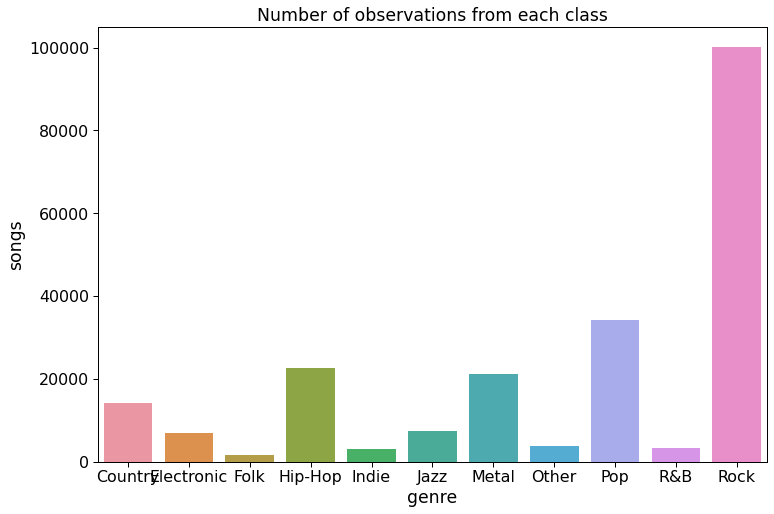

In [8]:
ax = sns.barplot(data=plot_data, x = 'genre', y = 'songs')
ax.set_title("Number of observations from each class")
plt.savefig("figs/d1_class_counts.pdf")
plt.show()

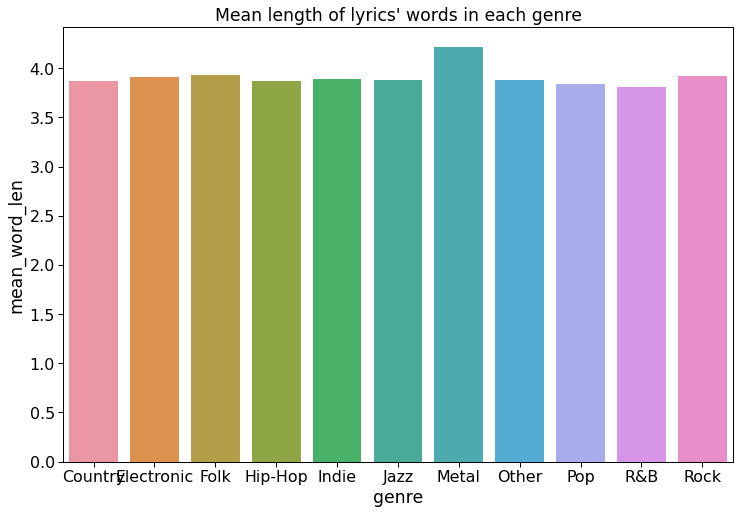

In [9]:
ax = sns.barplot(data=plot_data, x = 'genre', y = 'mean_word_len')
ax.set_title("Mean length of lyrics' words in each genre")
plt.show()

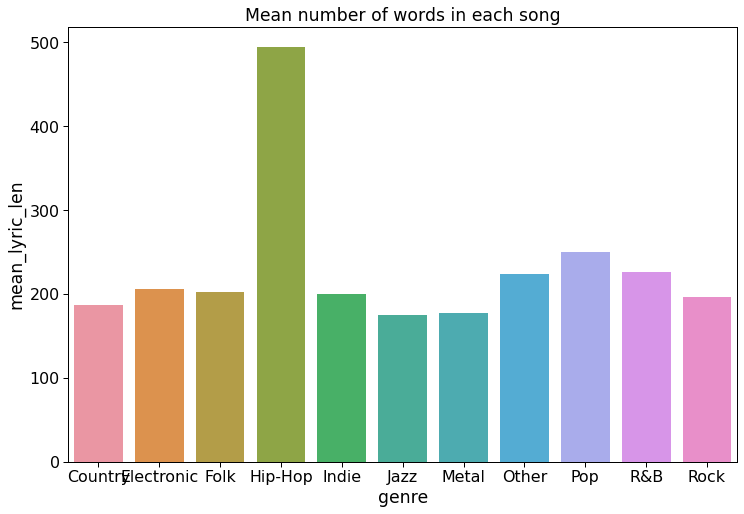

In [10]:
ax = sns.barplot(data=plot_data, x = 'genre', y = 'mean_lyric_len')
ax.set_title("Mean number of words in each song")
plt.savefig("figs/d1_mean_word_count.pdf")
plt.show()

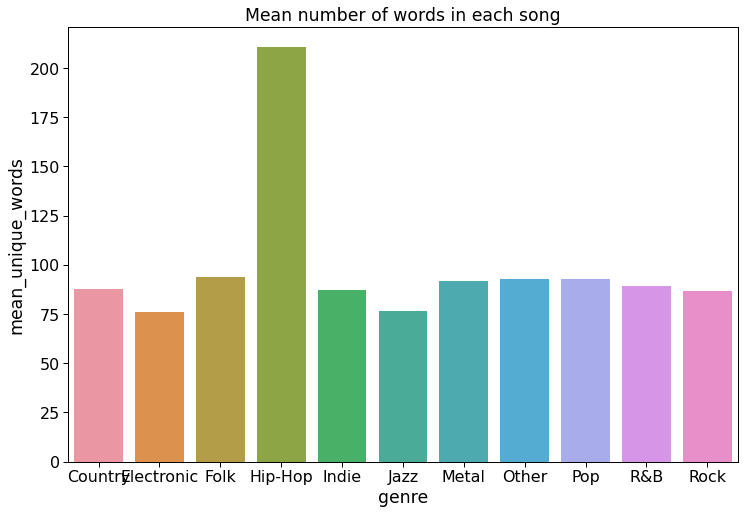

In [11]:
ax = sns.barplot(data=plot_data, x = 'genre', y = 'mean_unique_words')
ax.set_title("Mean number of words in each song")
plt.show()

## Wordcloud

In [12]:
stopwords = set(STOPWORDS)

In [13]:
def plot_word_cloud_for_genre(data, genre, save_name = None):
    cloud_lyrics = data.loc[data['genre'] == genre,'lyrics'].values
    cloud_words =  [w.lower() for l in cloud_lyrics for w in l.split()]
    cloud_string = " ".join(cloud_words)
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(cloud_string)
    
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Word cloud for {genre} genre", fontsize = 30)
    if save_name:
        plt.savefig(f"figs/{save_name}.pdf")
    plt.show()

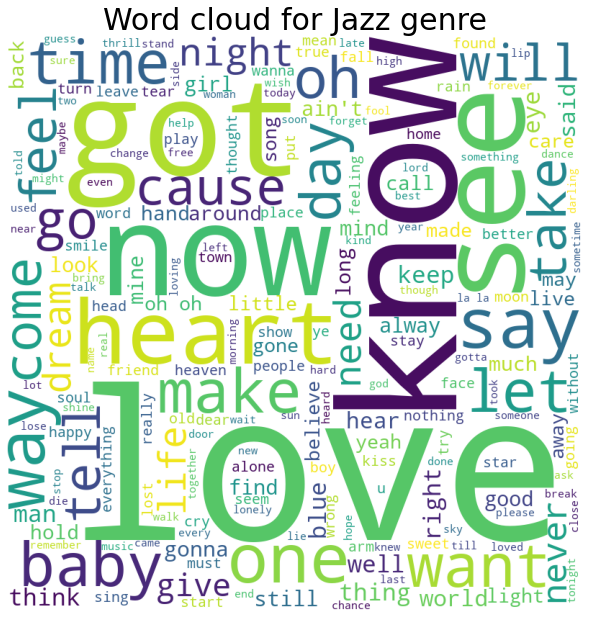

In [14]:
plot_word_cloud_for_genre(data, "Jazz")

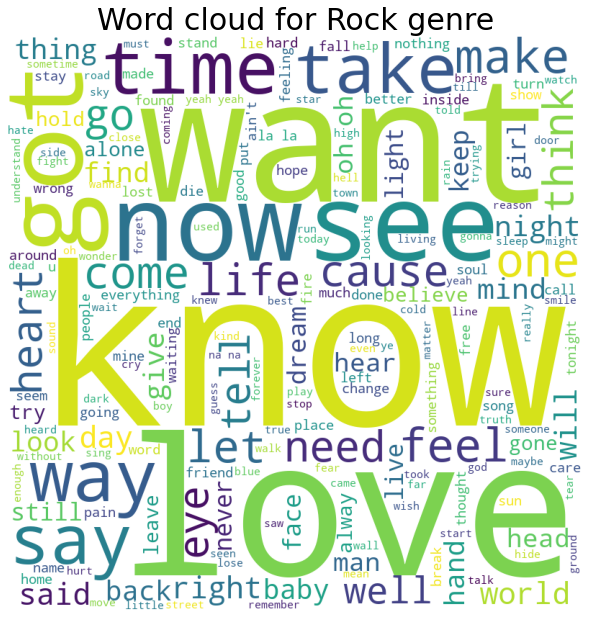

In [15]:
plot_word_cloud_for_genre(data, "Rock", save_name = "d1_rock_wordcloud")

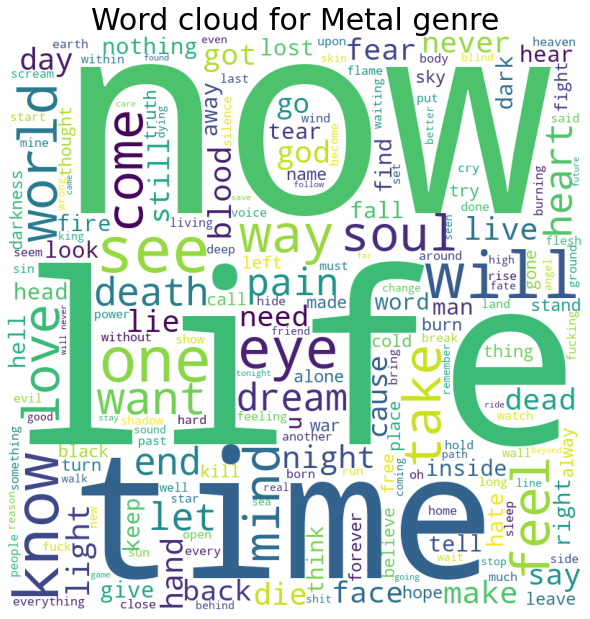

In [16]:
plot_word_cloud_for_genre(data, "Metal", save_name = "d1_metal_wordcloud")

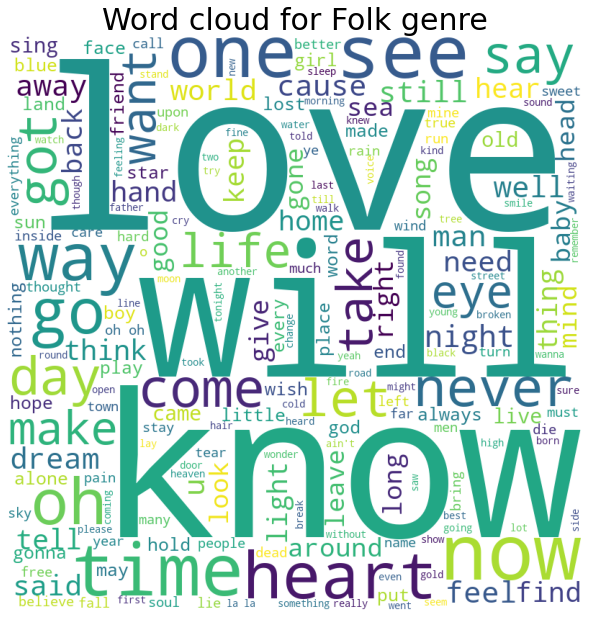

In [17]:
plot_word_cloud_for_genre(data, "Folk")

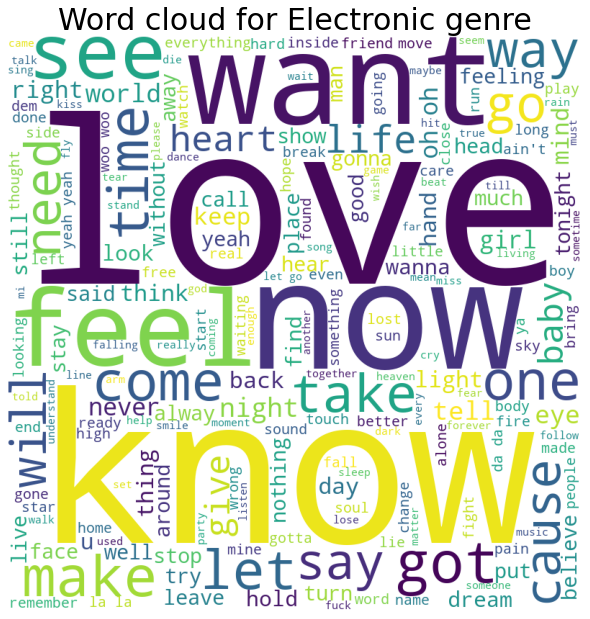

In [18]:
plot_word_cloud_for_genre(data, "Electronic")

## Years

In [19]:
plot_data = data.groupby('year').agg(
    songs=('song','count'), 
    mean_lyric_len = ('lyrics_len', 'mean'), 
    mean_unique_words = ('unique_words', 'mean'))
plot_data = plot_data.reset_index()

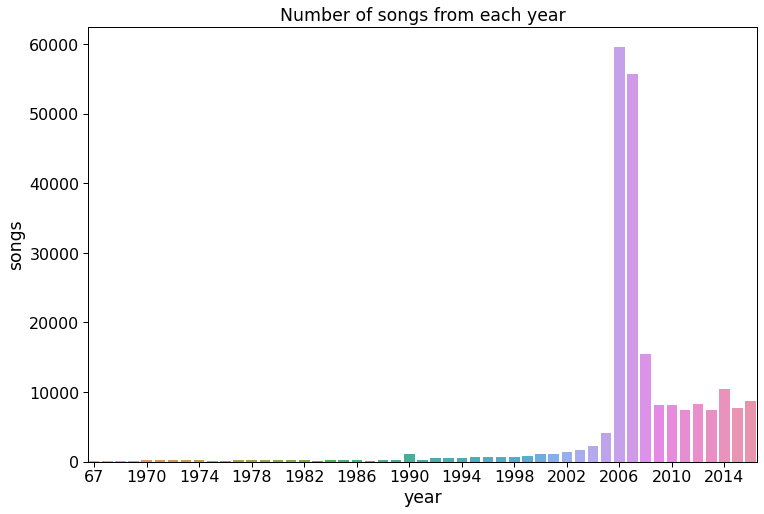

In [20]:
ax = sns.barplot(data=plot_data, x = 'year', y = 'songs')
ax.set_xticks(range(0,len(plot_data),4))
ax.set_title("Number of songs from each year")
plt.show()

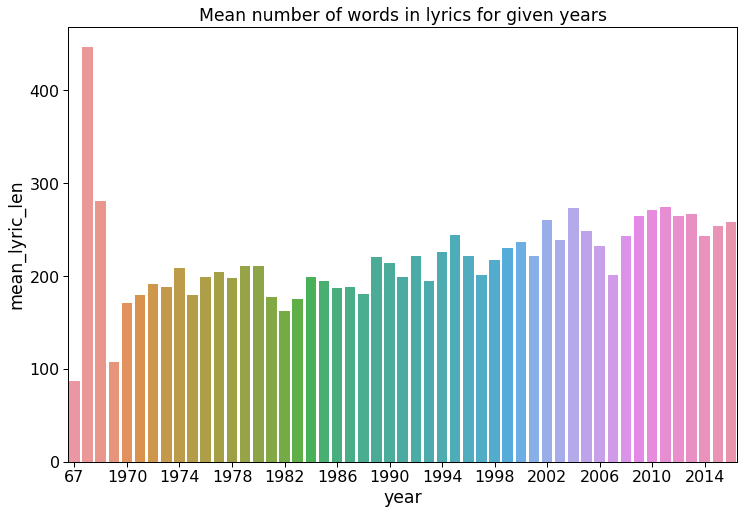

In [21]:
ax = sns.barplot(data=plot_data, x = 'year', y = 'mean_lyric_len')
ax.set_xticks(range(0,len(plot_data),4))
ax.set_title("Mean number of words in lyrics for given years")
plt.show()

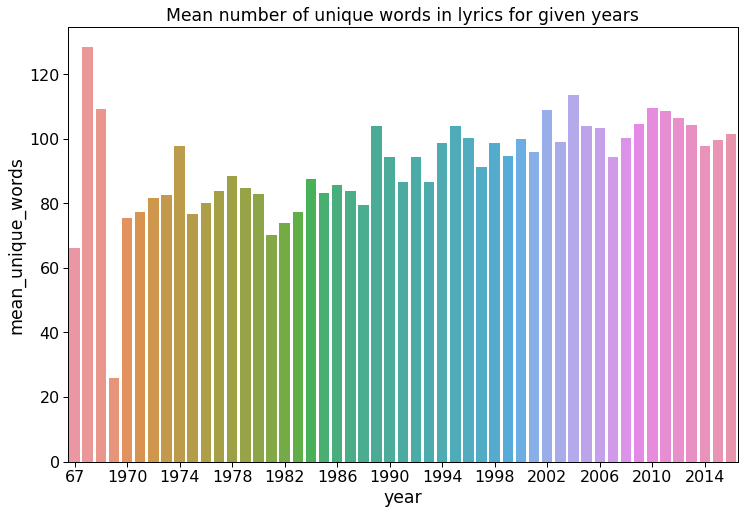

In [22]:
ax = sns.barplot(data=plot_data, x = 'year', y = 'mean_unique_words')
ax.set_xticks(range(0,len(plot_data),4))
ax.set_title("Mean number of unique words in lyrics for given years")
plt.show()

## Artists

In [23]:
plot_data = data.groupby(['artist']).agg(
    songs=('song','count'), 
    mean_lyric_len = ('lyrics_len', 'mean'), 
    mean_unique_words = ('unique_words', 'mean'))
plot_data = plot_data.reset_index()
plot_data = plot_data.sort_values('songs', ascending=False)

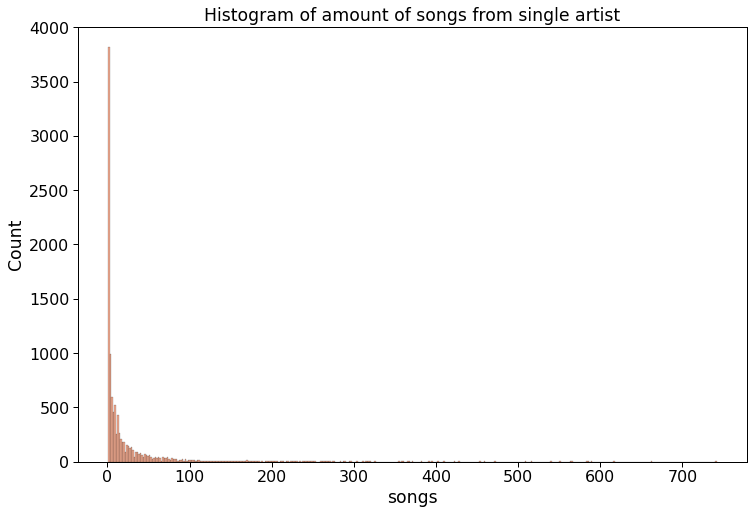

In [24]:
ax = sns.histplot(data=plot_data, x = 'songs')
ax.set_title("Histogram of amount of songs from single artist")
plt.show()

# Song lyrics from 79 musical genres

## Artists

In [25]:
data2 = pd.read_csv('data/raw/artists-data.csv')
data2.Genres = data2.Genres.str.replace(',', ';')
data2.Genres = data2.Genres.str.split(r'\s*;\s*').str[0]

In [26]:
data2

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop,167.0,1.5,/claudia-leitte/
...,...,...,...,...,...
4163,Miriam Makeba,World Music,17.0,0.0,/miriam-makeba/
4164,Freddie Aguilar,World Music,61.0,0.0,/freddie-aguilar/
4165,Amadou & Mariam,World Music,14.0,0.0,/amadou-mariam/
4166,Magic System,World Music,16.0,0.0,/magic-system/


In [27]:
plot_data = data2.groupby('Genres').agg(
    songs=('Songs','sum'), 
    mean_popularity = ('Popularity', 'mean'))
plot_data = plot_data.reset_index()

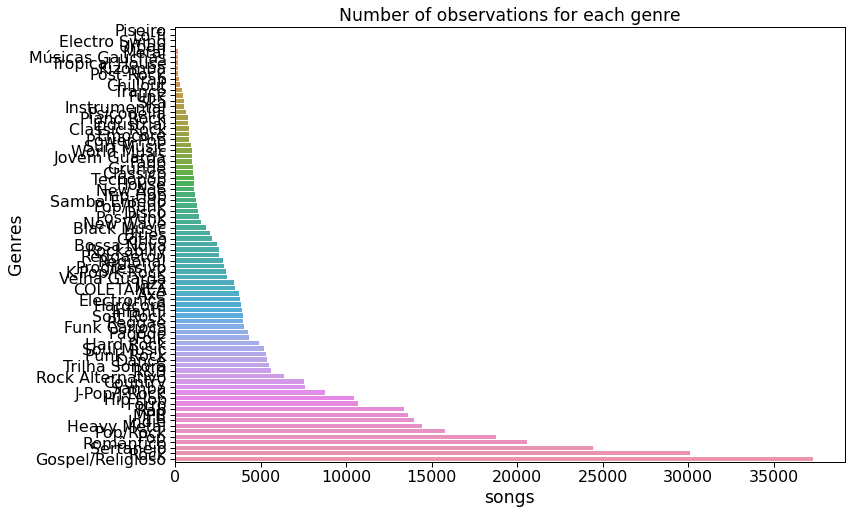

In [28]:
ax = sns.barplot(data=plot_data.sort_values('songs'), y = 'Genres', x = 'songs')
ax.set_title("Number of observations for each genre")
plt.show()

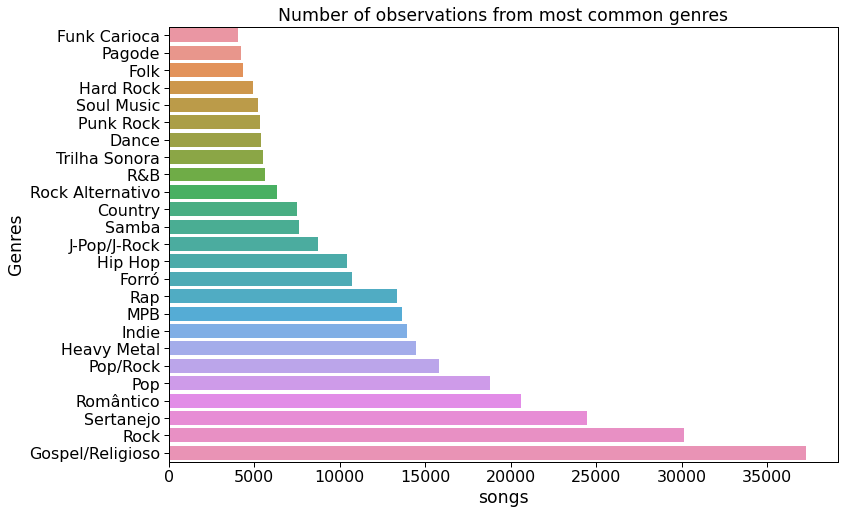

In [29]:
ax = sns.barplot(data=plot_data.sort_values('songs').loc[plot_data['songs']>4000], y = 'Genres', x = 'songs')
ax.set_title("Number of observations from most common genres")
plt.show()

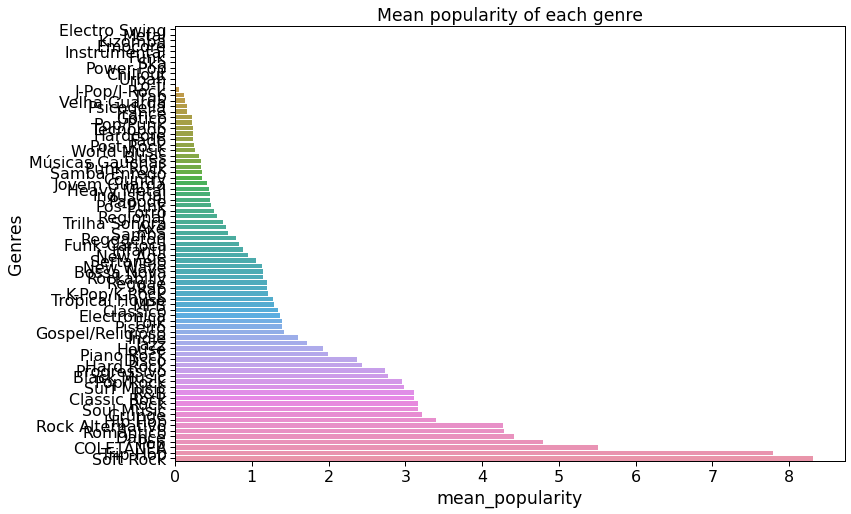

In [30]:
ax = sns.barplot(data=plot_data.sort_values('mean_popularity'), y = 'Genres', x = 'mean_popularity')
ax.set_title("Mean popularity of each genre")
plt.show()

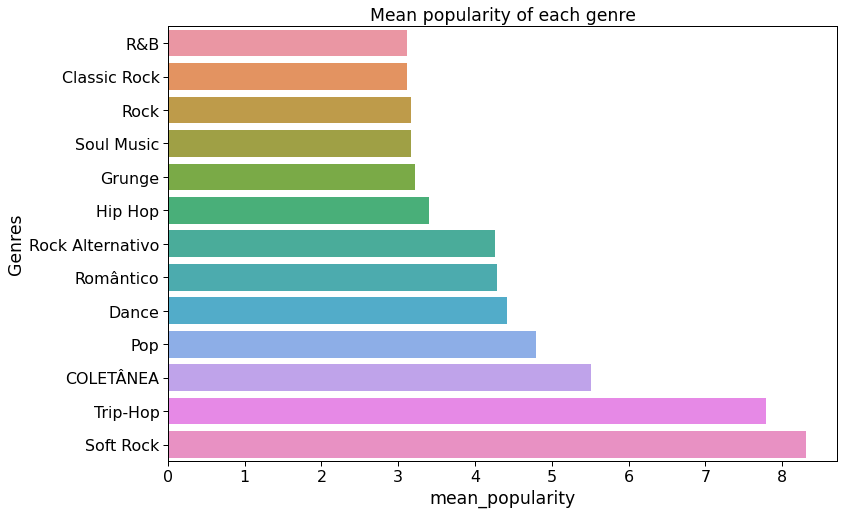

In [31]:
ax = sns.barplot(data=plot_data.sort_values('mean_popularity').loc[plot_data['mean_popularity']>3], y = 'Genres', x = 'mean_popularity')
ax.set_title("Mean popularity of each genre")
plt.show()

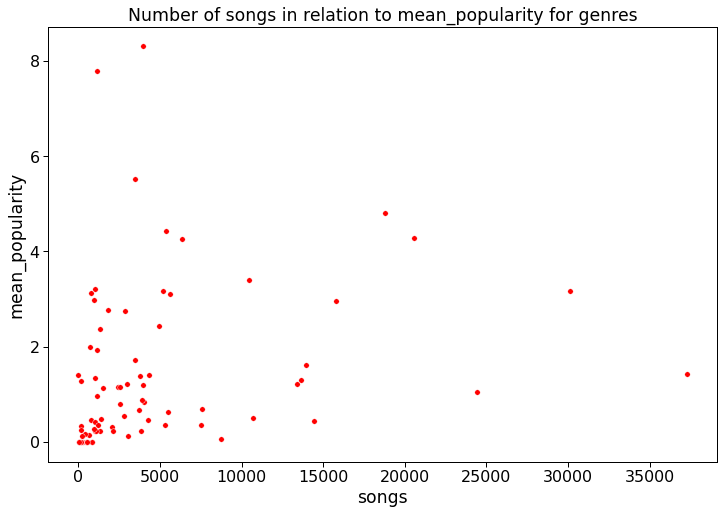

In [32]:
ax = sns.scatterplot(data=plot_data, x = 'songs', y='mean_popularity', s=30, color='r')
ax.set_title("Number of songs in relation to mean_popularity for genres")
plt.show()

## Lyrics

In [33]:
d2 = pd.read_csv('data/raw/lyrics-data.csv')
for word in ['"', '\[.*\]', ',', 'VERSE', 'Verse', 'CHORUS', 'Chorus', 'chorus']:
    d2.Lyric = d2.Lyric.str.replace(word, '', regex=True)
d2.Lyric = d2.Lyric.str.replace('\n', ' ')
d2 = d2[d2.language == 'en']
d2 = d2[['ALink', 'Lyric']]
d2 = d2.rename(columns={'ALink': 'Link'})
data3 = pd.merge(data2, d2, on='Link')
data3 = data3[['Artist','Genres', 'Lyric']]

In [34]:
data3

,Artist,Genres,Lyric
0,Ivete Sangalo,Pop,I feel so unsure As I take your hand and lead ...
1,Ivete Sangalo,Pop,Don't let them fool ya Or even try to school y...
2,Ivete Sangalo,Pop,Baby let's cruise away from here Don't be conf...
3,Ivete Sangalo,Pop,Know it sounds funny But I just can't stand th...
4,Ivete Sangalo,Pop,You've got that look again The one I hoped I h...
...,...,...,...
191382,Johnny Clegg,World Music,Here we stand waiting on the plain Darkness h...
191383,Johnny Clegg,World Music,I nearly disappeared into the mouth of a croco...
191384,Johnny Clegg,World Music,Amambuka amambuka azothengisa izwe lakithi izw...
191385,Johnny Clegg,World Music,Sweat in the heat for days on end waiting for ...


In [35]:
lyrics = data3['Lyric'].str.split(" ")
lyrics_len = [len(l) for l in lyrics]
unique_words = [len(np.unique([w.lower() for w in l])) for l in lyrics]
word_len = [np.mean([len(w) for w in l]) for l in lyrics]

In [36]:
data3['lyrics_len'] = lyrics_len
data3['unique_words'] = unique_words
data3['word_len'] = word_len

In [37]:
data3

,Artist,Genres,Lyric,lyrics_len,unique_words,word_len
0,Ivete Sangalo,Pop,I feel so unsure As I take your hand and lead ...,310,118,3.951613
1,Ivete Sangalo,Pop,Don't let them fool ya Or even try to school y...,168,81,3.636905
2,Ivete Sangalo,Pop,Baby let's cruise away from here Don't be conf...,165,78,3.921212
3,Ivete Sangalo,Pop,Know it sounds funny But I just can't stand th...,180,76,3.811111
4,Ivete Sangalo,Pop,You've got that look again The one I hoped I h...,224,109,3.647321
...,...,...,...,...,...,...
191382,Johnny Clegg,World Music,Here we stand waiting on the plain Darkness h...,204,105,4.166667
191383,Johnny Clegg,World Music,I nearly disappeared into the mouth of a croco...,141,74,3.907801
191384,Johnny Clegg,World Music,Amambuka amambuka azothengisa izwe lakithi izw...,226,139,4.030973
191385,Johnny Clegg,World Music,Sweat in the heat for days on end waiting for ...,247,139,3.951417


In [38]:
plot_data = data3.groupby('Genres').agg(
    songs=('Artist','count'), 
    mean_lyric_len = ('lyrics_len', 'mean'), 
    mean_unique_words = ('unique_words', 'mean'), 
    mean_word_len = ('word_len', 'mean'))
plot_data = plot_data.reset_index()

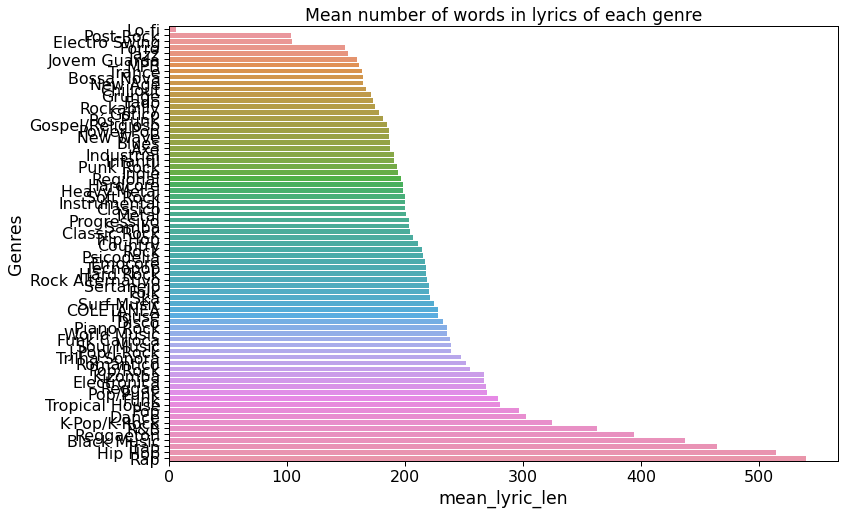

In [39]:
ax = sns.barplot(data=plot_data.sort_values('mean_lyric_len'), y = 'Genres', x = 'mean_lyric_len')
ax.set_title("Mean number of words in lyrics of each genre")
plt.show()

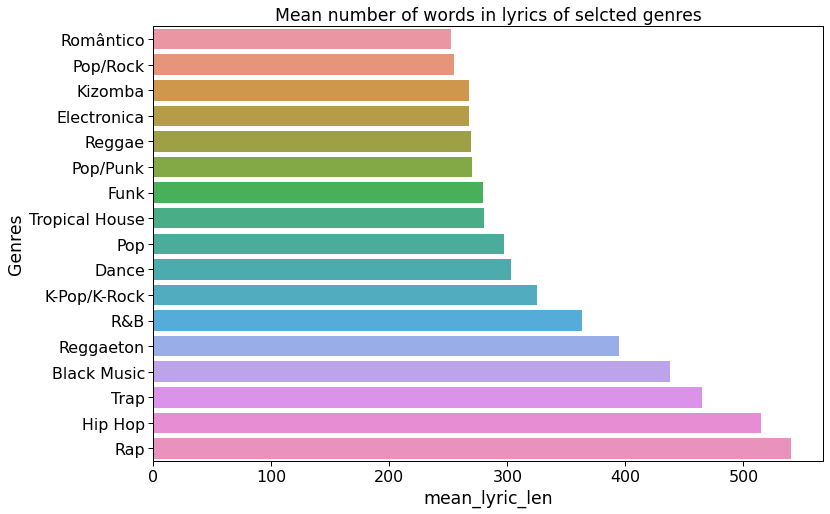

In [40]:
ax = sns.barplot(data=plot_data.sort_values('mean_lyric_len').loc[plot_data['mean_lyric_len']>250], y = 'Genres', x = 'mean_lyric_len')
ax.set_title("Mean number of words in lyrics of selcted genres")
plt.show()

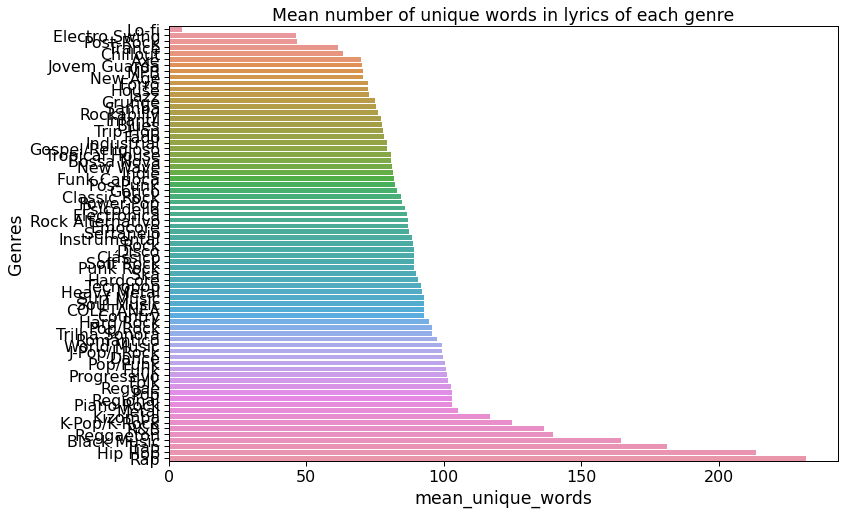

In [41]:
ax = sns.barplot(data=plot_data.sort_values('mean_unique_words'), y = 'Genres', x = 'mean_unique_words')
ax.set_title("Mean number of unique words in lyrics of each genre")
plt.show()

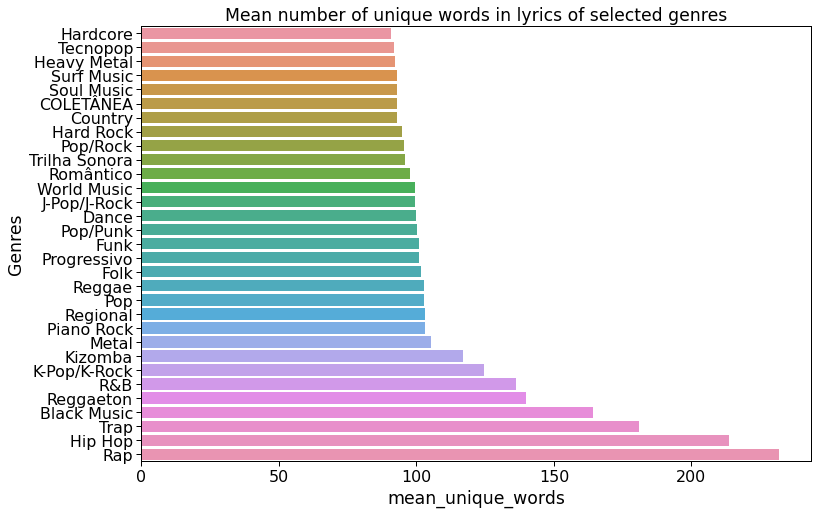

In [42]:
ax = sns.barplot(data=plot_data.sort_values('mean_unique_words').loc[plot_data['mean_unique_words']>90], y = 'Genres', x = 'mean_unique_words')
ax.set_title("Mean number of unique words in lyrics of selected genres")
plt.show()

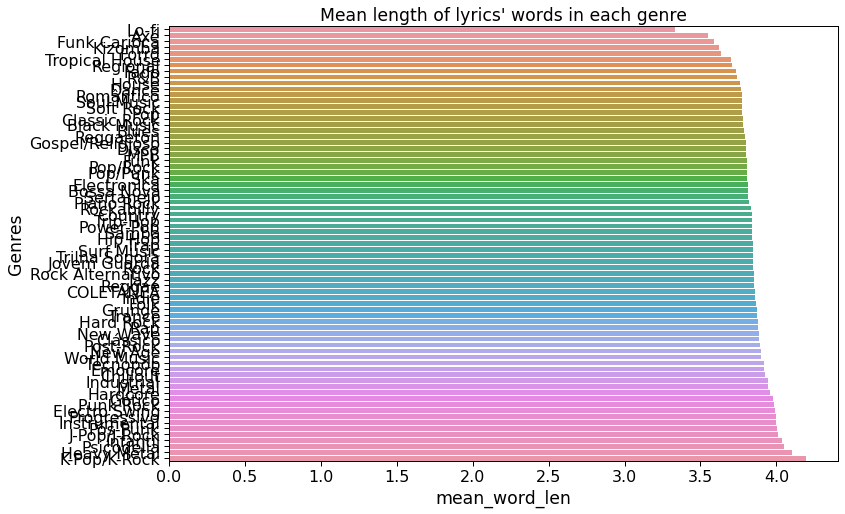

In [43]:
ax = sns.barplot(data=plot_data.sort_values('mean_word_len'), y = 'Genres', x = 'mean_word_len')
ax.set_title("Mean length of lyrics' words in each genre")
plt.show()

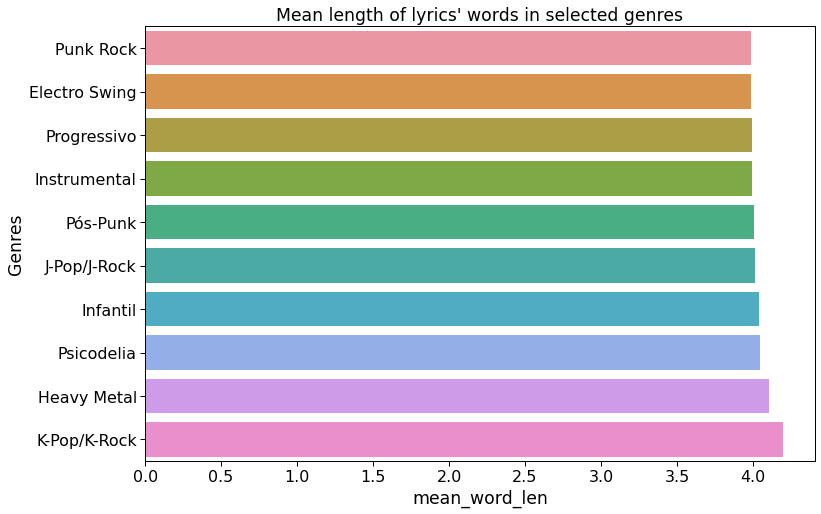

In [44]:
ax = sns.barplot(data=plot_data.sort_values('mean_word_len').iloc[-10:], y = 'Genres', x = 'mean_word_len')
ax.set_title("Mean length of lyrics' words in selected genres")
plt.show()